In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("C:\\Users\\Srishti\\Downloads\\customer_support_tickets.csv.zip")

# Display the first few rows of the dataset
data.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [69]:
# Re-import necessary libraries
from sklearn.ensemble import RandomForestClassifier
import numpy as np


In [70]:
# Remove rows with NaN values in the target variable (if any)
X_train_split_clean = X_train_split[~np.isnan(y_train_split)]
y_train_split_clean = y_train_split[~np.isnan(y_train_split)]

# Re-initialize the model (since the kernel was restarted)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Now train the model with cleaned data
rf_model.fit(X_train_split_clean, y_train_split_clean)

# You can now use the trained model for prediction or evaluation


RandomForestClassifier(random_state=42)

In [72]:
# Display data types of all columns
print(data.dtypes)

# Display sample values to inspect the format
print(data[['First Response Time', 'Time to Resolution']].head())

Ticket ID                         int64
Customer Name                    object
Customer Email                   object
Customer Age                      int64
Customer Gender                  object
Product Purchased                object
Date of Purchase                 object
Ticket Type                      object
Ticket Subject                   object
Ticket Description               object
Ticket Status                    object
Resolution                       object
Ticket Priority                  object
Ticket Channel                   object
First Response Time              object
Time to Resolution               object
Customer Satisfaction Rating    float64
dtype: object
   First Response Time   Time to Resolution
0  2023-06-01 12:15:36                  NaN
1  2023-06-01 16:45:38                  NaN
2  2023-06-01 11:14:38  2023-06-01 18:05:38
3  2023-06-01 07:29:40  2023-06-01 01:57:40
4  2023-06-01 00:12:42  2023-06-01 19:53:42


In [73]:
# Convert 'Date of Purchase' to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'], errors='coerce')

# Check the conversion
print(data['Date of Purchase'].head())


0   2021-03-22
1   2021-05-22
2   2020-07-14
3   2020-11-13
4   2020-02-04
Name: Date of Purchase, dtype: datetime64[ns]


In [74]:
# Convert 'First Response Time' to timedelta (if it's not already)
data['First Response Time'] = pd.to_timedelta(data['First Response Time'], errors='coerce')

# Convert 'Time to Resolution' to numeric (if it's not already)
data['Time to Resolution'] = pd.to_numeric(data['Time to Resolution'], errors='coerce')

# Check the conversion
print(data[['First Response Time', 'Time to Resolution']].head())


  First Response Time  Time to Resolution
0                 NaT                 NaN
1                 NaT                 NaN
2                 NaT                 NaN
3                 NaT                 NaN
4                 NaT                 NaN


In [75]:
# Fill missing 'First Response Time' with 0 (or another reasonable value)
data['First Response Time'].fillna(pd.Timedelta(0), inplace=True)

# Fill missing 'Time to Resolution' with the median (or 0 if preferred)
data['Time to Resolution'].fillna(data['Time to Resolution'].median(), inplace=True)

# For categorical columns, fill with a placeholder like 'Unknown'
data['Ticket Type'].fillna('Unknown', inplace=True)
data['Product Purchased'].fillna('Unknown', inplace=True)

# Check if any missing values remain
print(data.isnull().sum())


Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time                0
Time to Resolution              8469
Customer Satisfaction Rating    5700
dtype: int64


In [76]:
# Example: Convert categorical columns into numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Assuming you've split features and target variables
X = data_encoded.drop(columns=['Customer Satisfaction Rating'])  # Exclude target column
y = data_encoded['Customer Satisfaction Rating']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")



Training set size: (6775, 27265)
Test set size: (1694, 27265)


In [77]:
# Verify the shapes of X_train and y_train
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")


Shape of X_train: (6775, 27265)
Shape of y_train: (6775,)


In [78]:
# Step 1: Check if X_train has rows
print("Shape of X_train:", X_train.shape)
if X_train.shape[0] == 0:
    print("X_train is empty! There are no rows in the dataset.")
else:
    print(f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns.")


Shape of X_train: (6775, 27265)
X_train has 6775 rows and 27265 columns.


In [79]:
# Check if 'Time to Resolution' column exists in X_train
if 'Time to Resolution' in X_train.columns:
    print("'Time to Resolution' column exists.")
else:
    print("'Time to Resolution' column does not exist.")
    

'Time to Resolution' column exists.


In [80]:
# Check the shape of X_train before accessing the 'Time to Resolution' column
print("Shape of X_train:", X_train.shape)


Shape of X_train: (6775, 27265)


In [81]:
# Check column names to confirm 'Time to Resolution' exists
print("Columns in X_train:", X_train.columns)


Columns in X_train: Index(['Ticket ID', 'Customer Age', 'Date of Purchase', 'First Response Time',
       'Time to Resolution', 'Customer Name_Aaron Adams',
       'Customer Name_Aaron Aguilar', 'Customer Name_Aaron Brown',
       'Customer Name_Aaron Carter', 'Customer Name_Aaron Chavez',
       ...
       'Resolution_Your rule throughout push capital issue.',
       'Resolution_Yourself but scene lawyer certainly east.',
       'Resolution_Yourself factor open never dinner.',
       'Resolution_Yourself thought them both behind reflect character believe.',
       'Ticket Priority_High', 'Ticket Priority_Low', 'Ticket Priority_Medium',
       'Ticket Channel_Email', 'Ticket Channel_Phone',
       'Ticket Channel_Social media'],
      dtype='object', length=27265)


In [82]:
print("Shape of X_train:", X_train.shape)

print("Columns in X_train:", X_train.columns)

print(X_train.head())


Shape of X_train: (6775, 27265)
Columns in X_train: Index(['Ticket ID', 'Customer Age', 'Date of Purchase', 'First Response Time',
       'Time to Resolution', 'Customer Name_Aaron Adams',
       'Customer Name_Aaron Aguilar', 'Customer Name_Aaron Brown',
       'Customer Name_Aaron Carter', 'Customer Name_Aaron Chavez',
       ...
       'Resolution_Your rule throughout push capital issue.',
       'Resolution_Yourself but scene lawyer certainly east.',
       'Resolution_Yourself factor open never dinner.',
       'Resolution_Yourself thought them both behind reflect character believe.',
       'Ticket Priority_High', 'Ticket Priority_Low', 'Ticket Priority_Medium',
       'Ticket Channel_Email', 'Ticket Channel_Phone',
       'Ticket Channel_Social media'],
      dtype='object', length=27265)
      Ticket ID  Customer Age Date of Purchase First Response Time  \
2794       2795            26       2021-01-14              0 days   
7497       7498            23       2021-01-11       

In [83]:
X_train = X_train.drop(columns=['Time to Resolution'])




In [84]:
from sklearn.model_selection import train_test_split

# If you have your target variable (y_train), split your dataset
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Check the shape of your train and test splits
print("Shape of X_train_split:", X_train_split.shape)
print("Shape of X_test_split:", X_test_split.shape)


Shape of X_train_split: (5420, 27264)
Shape of X_test_split: (1355, 27264)


In [85]:
#Scale/Normalize the Features
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
numerical_columns = X_train_split.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns only
X_train_scaled = X_train_split[numerical_columns]
X_test_scaled = X_test_split[numerical_columns]

X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Replace the original numerical columns with scaled columns
X_train_split[numerical_columns] = X_train_scaled
X_test_split[numerical_columns] = X_test_scaled

# Check the scaled data
print("Scaled X_train_split:")
print(X_train_split.head())



Scaled X_train_split:
      Ticket ID  Customer Age Date of Purchase First Response Time  \
5357   0.449929     -0.666514       2020-09-15              0 days   
71    -1.708482     -0.470612       2020-09-26              0 days   
2448  -0.737891      1.096608       2021-03-30              0 days   
1485  -1.131109      1.292511       2021-11-29              0 days   
4342   0.035478      0.247697       2020-10-07              0 days   

      Customer Name_Aaron Adams  Customer Name_Aaron Aguilar  \
5357                          0                            0   
71                            0                            0   
2448                          0                            0   
1485                          0                            0   
4342                          0                            0   

      Customer Name_Aaron Brown  Customer Name_Aaron Carter  \
5357                          0                           0   
71                            0               

In [86]:
# Print the shapes of the features and target variable
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train_scaled: (5420, 2)
Shape of y_train: (6775,)


In [87]:
# Check the shapes of the original X_train and y_train
print("Original shape of X_train:", X_train.shape)
print("Original shape of y_train:", y_train.shape)



Original shape of X_train: (6775, 27264)
Original shape of y_train: (6775,)


In [88]:
# Select only numerical columns for scaling
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])

# Apply scaling to numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Now split the data into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Check the shapes
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_train_split:", X_train_split.shape)
print("Shape of X_val_split:", X_val_split.shape)
print("Shape of y_train_split:", y_train_split.shape)
print("Shape of y_val_split:", y_val_split.shape)



Shape of X_train_scaled: (6775, 2)
Shape of X_train_split: (5420, 2)
Shape of X_val_split: (1355, 2)
Shape of y_train_split: (5420,)
Shape of y_val_split: (1355,)


In [89]:
# Check which columns are being selected for scaling
print("Numerical columns being scaled:", X_train.select_dtypes(include=['float64', 'int64']).columns)


Numerical columns being scaled: Index(['Ticket ID', 'Customer Age'], dtype='object')


In [90]:
# Check data types of all columns in X_train
print(X_train.dtypes)


Ticket ID                                int64
Customer Age                             int64
Date of Purchase                datetime64[ns]
First Response Time            timedelta64[ns]
Customer Name_Aaron Adams                uint8
                                    ...       
Ticket Priority_Low                      uint8
Ticket Priority_Medium                   uint8
Ticket Channel_Email                     uint8
Ticket Channel_Phone                     uint8
Ticket Channel_Social media              uint8
Length: 27264, dtype: object


In [91]:
# Convert 'Date of Purchase' to datetime if it's not already in the correct format
X_train['Date of Purchase'] = pd.to_datetime(X_train['Date of Purchase'])

# Extract year, month, day, or the number of days since the purchase
X_train['Year of Purchase'] = X_train['Date of Purchase'].dt.year
X_train['Month of Purchase'] = X_train['Date of Purchase'].dt.month
X_train['Day of Purchase'] = X_train['Date of Purchase'].dt.day
X_train['Days Since Purchase'] = (pd.to_datetime('today') - X_train['Date of Purchase']).dt.days


In [92]:
# Convert 'First Response Time' to seconds or any other desired unit
X_train['First Response Time in seconds'] = X_train['First Response Time'].dt.total_seconds()


In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Convert 'Date of Purchase' to numerical features
X_train['Date of Purchase'] = pd.to_datetime(X_train['Date of Purchase'])
X_train['Year of Purchase'] = X_train['Date of Purchase'].dt.year
X_train['Month of Purchase'] = X_train['Date of Purchase'].dt.month
X_train['Day of Purchase'] = X_train['Date of Purchase'].dt.day
X_train['Days Since Purchase'] = (pd.to_datetime('today') - X_train['Date of Purchase']).dt.days

# Convert 'First Response Time' to numerical format (e.g., in seconds)
X_train['First Response Time in seconds'] = X_train['First Response Time'].dt.total_seconds()

# Now select the correct columns for scaling (after conversion)
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Apply standard scaling to numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])

# If you need to split your data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Proceed with model training or other steps


In [94]:
print(y_train_split.shape)
print(y_train_split.head())  # Display the first few entries of y_train_split


(5420,)
5357    5.0
71      NaN
2448    NaN
1485    NaN
4342    5.0
Name: Customer Satisfaction Rating, dtype: float64


In [95]:
y_train_split = y_train_split.ravel()  # This ensures it's a 1D array


In [96]:
print(X_train_split.shape)


(5420, 7)


In [97]:
print(X_train_split.shape)  # Check the number of rows and columns


(5420, 7)


In [98]:
import pandas as pd
X_train_split_df = pd.DataFrame(X_train_split)
print(X_train_split_df.dtypes)  # Now you can check the data types


0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object


In [99]:
# Check for missing values in the feature matrix
print(pd.DataFrame(X_train_split).isnull().sum())




0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


In [100]:
print("Shape of y_train_split:", y_train_split.shape)
print("Data type of y_train_split:", y_train_split.dtype)



Shape of y_train_split: (5420,)
Data type of y_train_split: float64


In [101]:
print("Shape of X_train_split:", X_train_split.shape)
print("First few rows of X_train_split:", X_train_split[:5])



Shape of X_train_split: (5420, 7)
First few rows of X_train_split: [[ 0.45933395 -0.66278951 -1.00221648  0.72018824 -0.06050342  0.50616284
   0.        ]
 [-1.71066274 -0.46671079 -1.00221648  0.72018824  1.20146613  0.45407784
   0.        ]
 [-0.73486211  1.10191904  0.99778842 -1.00933571  1.66036414 -0.4218973
   0.        ]
 [-1.13019068  1.29799777  0.99778842  1.29669623  1.54563964 -1.57723749
   0.        ]
 [ 0.04265846  0.25224455 -1.00221648  1.00844223 -0.97829945  0.40199283
   0.        ]]


In [102]:
print("Any NaN values in X_train_split:", np.any(np.isnan(X_train_split)))
print("Any infinite values in X_train_split:", np.any(np.isinf(X_train_split)))

print("Any NaN values in y_train_split:", np.any(np.isnan(y_train_split)))
print("Any infinite values in y_train_split:", np.any(np.isinf(y_train_split)))


Any NaN values in X_train_split: False
Any infinite values in X_train_split: False
Any NaN values in y_train_split: True
Any infinite values in y_train_split: False


In [103]:
# Remove rows with NaN values in the target variable
X_train_split_clean = X_train_split[~np.isnan(y_train_split)]
y_train_split_clean = y_train_split[~np.isnan(y_train_split)]

# Now train the model with cleaned data
rf_model.fit(X_train_split_clean, y_train_split_clean)


RandomForestClassifier(random_state=42)

In [104]:
print(f"X_train_split shape: {X_train_split.shape}, y_train_split shape: {y_train_split.shape}")


X_train_split shape: (5420, 7), y_train_split shape: (5420,)


In [105]:
print(f"Shape of y_train_split: {y_train_split.shape}")
print(f"Type of y_train_split: {type(y_train_split)}")



Shape of y_train_split: (5420,)
Type of y_train_split: <class 'numpy.ndarray'>


In [106]:
import numpy as np

# Check for any NaN values in y_train_split
print(f"Any NaN values in y_train_split: {np.any(np.isnan(y_train_split))}")


Any NaN values in y_train_split: True


In [107]:
# Remove rows where y_train_split has NaN values
non_nan_indices = ~np.isnan(y_train_split)

# Filter both X_train_split and y_train_split to remove NaN entries
X_train_split = X_train_split[non_nan_indices]
y_train_split = y_train_split[non_nan_indices]

# Verify if NaN values are removed
print(f"Any NaN values in y_train_split after removal: {np.any(np.isnan(y_train_split))}")


Any NaN values in y_train_split after removal: False


In [108]:
# Train the Random Forest model
rf_model.fit(X_train_split, y_train_split)


RandomForestClassifier(random_state=42)

In [109]:
# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val_split)


In [110]:
#evaluate model performance
print(f"Shape of y_val_split: {y_val_split.shape}")
print(f"Shape of y_val_pred: {y_val_pred.shape}")


Shape of y_val_split: (1355,)
Shape of y_val_pred: (1355,)


In [111]:
print(f"First few predictions: {y_val_pred[:10]}")
print(f"First few actual values: {y_val_split[:10]}")


First few predictions: [2. 4. 4. 1. 3. 3. 2. 2. 2. 4.]
First few actual values: 2693   NaN
4193   NaN
2747   NaN
7482   NaN
1086   NaN
5923   NaN
4031   NaN
7640   NaN
6542   NaN
494    NaN
Name: Customer Satisfaction Rating, dtype: float64


In [112]:
# Remove rows where y_val_split contains NaN values
valid_rows = ~y_val_split.isna()  # This creates a boolean mask to filter out NaN rows
y_val_split_clean = y_val_split[valid_rows]
X_val_split_clean = X_val_split[valid_rows]

# If you had a similar issue with the training set, you could apply the same method there


In [113]:
# Ensure predictions match the cleaned validation set
y_val_pred_clean = y_val_pred[valid_rows]


In [114]:
print(f"First few predictions: {y_val_pred[:10]}")


First few predictions: [2. 4. 4. 1. 3. 3. 2. 2. 2. 4.]


In [116]:
# Re-import necessary functions from sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Recalculate accuracy and other metrics
accuracy = accuracy_score(y_val_split_clean, y_val_pred_clean)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:\n", classification_report(y_val_split_clean, y_val_pred_clean))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val_split_clean, y_val_pred_clean))


Accuracy: 0.19111111111111112
Classification Report:
               precision    recall  f1-score   support

         1.0       0.20      0.15      0.17        99
         2.0       0.21      0.19      0.20        93
         3.0       0.19      0.20      0.20       108
         4.0       0.16      0.23      0.19        66
         5.0       0.19      0.19      0.19        84

    accuracy                           0.19       450
   macro avg       0.19      0.19      0.19       450
weighted avg       0.19      0.19      0.19       450

Confusion Matrix:
 [[15 16 27 23 18]
 [18 18 28 13 16]
 [24 22 22 22 18]
 [13 11 12 15 15]
 [ 6 18 24 20 16]]


In [117]:
#confusion matrix
# Check data types of y_val_split and y_val_pred
print(f"Data type of y_val_split: {y_val_split.dtype}")
print(f"Data type of y_val_pred: {y_val_pred.dtype}")





Data type of y_val_split: float64
Data type of y_val_pred: float64


In [118]:
# Remove rows with NaN values from both y_val_split and y_val_pred
valid_indices = ~y_val_split.isna() & ~pd.Series(y_val_pred).isna()

y_val_split_clean = y_val_split[valid_indices]
y_val_pred_clean = pd.Series(y_val_pred)[valid_indices]

# Now convert to integer type
y_val_split_clean = y_val_split_clean.astype(int)
y_val_pred_clean = y_val_pred_clean.astype(int)

# Check the cleaned data
print(f"Cleaned y_val_split shape: {y_val_split_clean.shape}")
print(f"Cleaned y_val_pred shape: {y_val_pred_clean.shape}")


Cleaned y_val_split shape: (69,)
Cleaned y_val_pred shape: (69,)


In [119]:
print(type(y_val_split))
print(type(y_val_pred))
print(y_val_split[:5])  # Print first few values
print(y_val_pred[:5])   # Print first few predicted values



<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
2693   NaN
4193   NaN
2747   NaN
7482   NaN
1086   NaN
Name: Customer Satisfaction Rating, dtype: float64
[2. 4. 4. 1. 3.]


In [120]:
print(f"Length of y_val_split: {len(y_val_split)}")
print(f"Length of y_val_pred: {len(y_val_pred)}")


Length of y_val_split: 1355
Length of y_val_pred: 1355


In [121]:
import numpy as np

# Check for NaN values in y_val_split (pandas Series)
print(f"Any NaN values in y_val_split: {y_val_split.isna().any()}")

# Check for NaN values in y_val_pred (numpy array)
print(f"Any NaN values in y_val_pred: {np.isnan(y_val_pred).any()}")


Any NaN values in y_val_split: True
Any NaN values in y_val_pred: False


In [122]:
# Remove rows where y_val_split has NaN values
valid_indices = ~np.isnan(y_val_split)
X_val_split_clean = X_val_split[valid_indices]
y_val_split_clean = y_val_split[valid_indices]

# Check the cleaned shapes
print(f"Cleaned X_val_split shape: {X_val_split_clean.shape}")
print(f"Cleaned y_val_split shape: {y_val_split_clean.shape}")

# Proceed to re-fit the model with the cleaned data


Cleaned X_val_split shape: (450, 7)
Cleaned y_val_split shape: (450,)


Confusion Matrix:
[[15 16 27 23 18]
 [18 18 28 13 16]
 [24 22 22 22 18]
 [13 11 12 15 15]
 [ 6 18 24 20 16]]


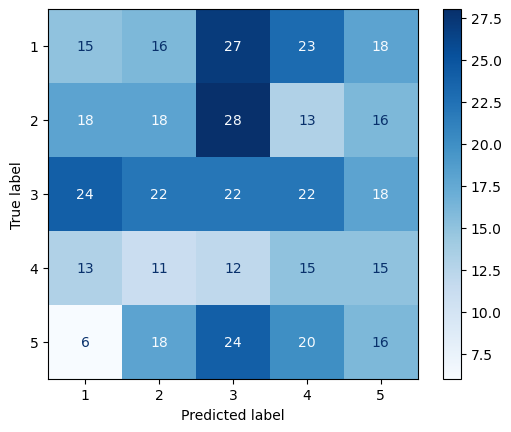

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay


# Ensure X_val_split_clean corresponds to the cleaned y_val_split_clean
X_val_split_clean = X_val_split[y_val_split.notna()]  # Align based on non-NaN values in y_val_split

# Regenerate predictions for the cleaned validation set
y_val_pred_clean = rf_model.predict(X_val_split_clean)

# Now generate the confusion matrix using cleaned data
cm = confusion_matrix(y_val_split_clean, y_val_pred_clean)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
disp.plot(cmap='Blues')

# Optionally, print the confusion matrix
print("Confusion Matrix:")
print(cm)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters found by RandomizedSearchCV: {'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Accuracy of the tuned model: 0.2311111111111111
Classification Report:
               precision    recall  f1-score   support

         1.0       0.26      0.18      0.21        99
         2.0       0.25      0.23      0.24        93
         3.0       0.28      0.31      0.29       108
         4.0       0.18      0.29      0.22        66
         5.0       0.19      0.15      0.17        84

    accuracy                           0.23       450
   macro avg       0.23      0.23      0.23       450
weighted avg       0.24      0.23      0.23       450



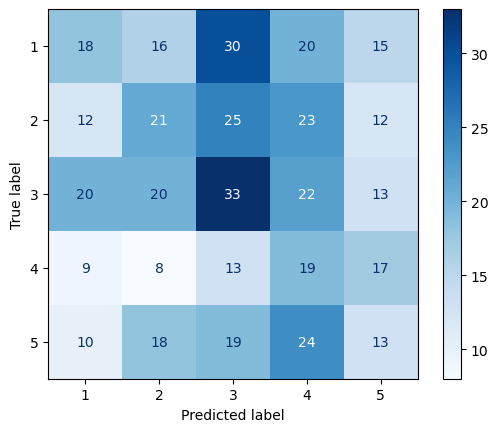

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_dist = {
    'n_estimators': [50, 100, 150, 200],  # You can add more values if needed
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with cross-validation
# We use 100 iterations for a more limited search; you can increase this number if desired.
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train_split, y_train_split)

# Get the best hyperparameters from the random search
print("Best Hyperparameters found by RandomizedSearchCV:", random_search.best_params_)

# Evaluate the model with the best parameters on the validation set
best_rf_model = random_search.best_estimator_
y_val_pred = best_rf_model.predict(X_val_split_clean)

# Evaluate the performance of the tuned model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_val_split_clean, y_val_pred)
print(f"Accuracy of the tuned model: {accuracy}")

# Classification report
print("Classification Report:\n", classification_report(y_val_split_clean, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_val_split_clean, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
disp.plot(cmap='Blues')



In [130]:
#to reduce search space
param_grid = {
    'n_estimators': [100, 150],  # Fewer options for n_estimators
    'max_depth': [None, 10],  # Fewer depths
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto'],
    'bootstrap': [True]
}

In [131]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train_split, y_train_split)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None, 10],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 150]},
                   verbose=2)

Best Hyperparameters found by RandomizedSearchCV: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 121}
Accuracy of the tuned model: 0.22
Classification Report:
               precision    recall  f1-score   support

         1.0       0.22      0.15      0.18        99
         2.0       0.23      0.16      0.19        93
         3.0       0.27      0.31      0.29       108
         4.0       0.19      0.33      0.24        66
         5.0       0.16      0.15      0.16        84

    accuracy                           0.22       450
   macro avg       0.22      0.22      0.21       450
weighted avg       0.22      0.22      0.21       450



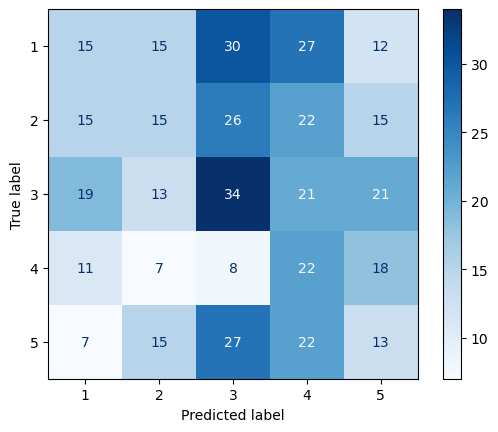

In [133]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Print the best parameters found by RandomizedSearchCV
print("Best Hyperparameters found by RandomizedSearchCV:", random_search.best_params_)

# Use the best estimator from the search for predictions
best_rf_model = random_search.best_estimator_

# Generate predictions for the cleaned validation set
y_val_pred = best_rf_model.predict(X_val_split_clean)

# Calculate accuracy and print it
accuracy = accuracy_score(y_val_split_clean, y_val_pred)
print(f"Accuracy of the tuned model: {accuracy}")

# Print the classification report for precision, recall, and f1-score
print("Classification Report:\n", classification_report(y_val_split_clean, y_val_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_val_split_clean, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
disp.plot(cmap='Blues')


In [135]:
import joblib
joblib.dump(best_rf_model, 'final_rf_model.joblib')


['final_rf_model.joblib']

In [137]:
# Load the model
loaded_rf_model = joblib.load('final_rf_model.joblib')

# Predict on validation data
predictions = loaded_rf_model.predict(X_val_split_clean)

# Print predictions
print(predictions)


[4. 1. 1. 1. 3. 4. 4. 4. 4. 2. 5. 5. 2. 4. 1. 2. 5. 1. 2. 2. 2. 2. 1. 4.
 2. 4. 5. 3. 4. 3. 4. 3. 2. 3. 3. 3. 3. 5. 1. 4. 4. 5. 2. 2. 3. 3. 5. 4.
 3. 3. 4. 5. 5. 5. 2. 3. 3. 4. 5. 2. 1. 2. 4. 4. 1. 3. 5. 3. 5. 2. 4. 4.
 3. 4. 5. 3. 4. 2. 5. 4. 1. 5. 3. 3. 5. 3. 4. 2. 4. 3. 2. 3. 4. 4. 5. 2.
 3. 5. 3. 2. 1. 1. 3. 1. 5. 5. 2. 4. 5. 4. 4. 5. 4. 4. 4. 1. 4. 3. 4. 4.
 3. 3. 3. 3. 3. 3. 5. 1. 4. 4. 3. 3. 2. 3. 2. 4. 2. 4. 5. 4. 3. 3. 5. 5.
 3. 4. 1. 5. 1. 3. 3. 5. 5. 1. 2. 3. 1. 3. 3. 1. 1. 3. 5. 4. 1. 3. 5. 1.
 4. 3. 4. 1. 3. 1. 4. 2. 4. 3. 3. 1. 1. 4. 2. 5. 4. 4. 4. 4. 4. 5. 2. 5.
 3. 3. 3. 4. 3. 4. 3. 1. 5. 1. 4. 3. 2. 5. 4. 3. 5. 5. 1. 2. 1. 3. 4. 5.
 5. 2. 2. 2. 2. 5. 3. 4. 3. 4. 5. 2. 4. 3. 2. 4. 4. 4. 1. 3. 1. 3. 5. 4.
 3. 4. 4. 2. 5. 3. 4. 4. 5. 5. 4. 5. 1. 3. 4. 3. 4. 3. 5. 5. 1. 3. 3. 5.
 1. 5. 4. 4. 3. 2. 1. 4. 4. 5. 2. 5. 3. 3. 5. 2. 2. 1. 3. 5. 4. 2. 4. 4.
 3. 2. 4. 3. 1. 5. 4. 4. 3. 5. 3. 3. 3. 3. 1. 4. 2. 5. 4. 1. 1. 3. 3. 5.
 3. 1. 3. 3. 1. 3. 3. 2. 2. 2. 1. 1. 1. 4. 2. 3. 4.

In [138]:
#store predictions
import pandas as pd

# Assuming y_val_split_clean contains the actual labels for validation
results_df = pd.DataFrame({'Actual': y_val_split_clean, 'Predicted': y_val_pred})
results_df.to_csv('predictions_vs_actuals.csv', index=False)


Model Accuracy: 0.22
Classification Report:
               precision    recall  f1-score   support

         1.0       0.22      0.15      0.18        99
         2.0       0.23      0.16      0.19        93
         3.0       0.27      0.31      0.29       108
         4.0       0.19      0.33      0.24        66
         5.0       0.16      0.15      0.16        84

    accuracy                           0.22       450
   macro avg       0.22      0.22      0.21       450
weighted avg       0.22      0.22      0.21       450



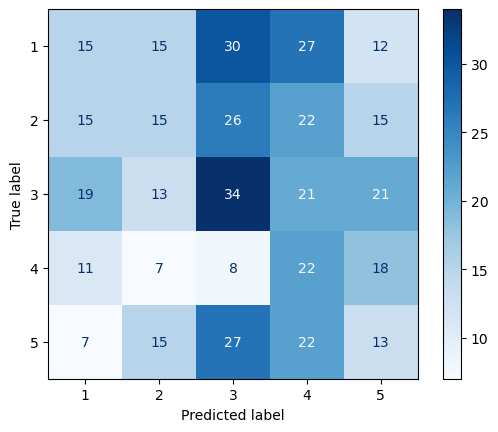

In [139]:
#evaluate predictions
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate and print accuracy
accuracy = accuracy_score(y_val_split_clean, y_val_pred)
print(f"Model Accuracy: {accuracy}")

# Print classification report for precision, recall, f1-score, etc.
print("Classification Report:\n", classification_report(y_val_split_clean, y_val_pred))

# Display the confusion matrix
cm = confusion_matrix(y_val_split_clean, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5])
disp.plot(cmap='Blues')


In [140]:
#save predictions
import joblib
joblib.dump(y_val_pred, 'predictions.joblib')


['predictions.joblib']